In [305]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
print(cv2.__version__)

4.2.0


In [307]:
#images_dir = "C:/Users/COI-AI-19/Desktop/data"
#image_files = os.listdir(images_dir)

In [308]:
#image_path = "{}/{}".format(images_dir, "number.jpg")

In [309]:
import numpy as np
import cv2
number_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
cap = cv2.VideoCapture('http://192.168.43.1:8080/video')
count = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    number = number_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    for (x,y,w,h) in number:
        print(x,y,w,h)
        r_gray = gray[y:y+h, x:x+w]
        r_color = frame[y:y+h, x:x+w]
        count = count +1
        img_item = "C:/Users/dell/Downloads/number plate/numplatestore/t1.jpg"
        cv2.imwrite(img_item, r_gray)
        color = (255,0,0)
        stroke = 2
        end_co_x = x + w
        end_co_y = y + h
        cv2.rectangle(frame, (x, y), (end_co_x,end_co_y), color, stroke) 
    
    # Display the resulting frame
    cv2.imshow('frame',  frame )
    
    if cv2.waitKey(30) & 0xFF == ord('y'):
        break
    elif count >=30:
        break
cap.release()
cv2.destroyAllWindows()

282 175 135 45
281 174 135 45
281 175 135 45
283 175 135 45
283 175 135 45
284 175 135 45
284 175 135 45
283 175 135 45
284 175 135 45
282 175 135 45
283 175 135 45
283 175 135 45
283 175 135 45
283 175 135 45
283 175 135 45
282 175 135 45
282 175 135 45
283 176 135 45
283 175 135 45
284 176 135 45
283 176 135 45
284 176 135 45
283 175 135 45
282 175 135 45
284 174 135 45
284 175 135 45
285 174 135 45
284 175 135 45
283 175 135 45
284 175 135 45


In [310]:
#images_dir = "C:/Users/COI-AI-19/numb"
images_dir = "C:/Users/dell/Downloads/number plate/numplatestore"
image_path = "{}/{}".format(images_dir, "t1.jpg")
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(gray, 127, 255, 0)

In [311]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

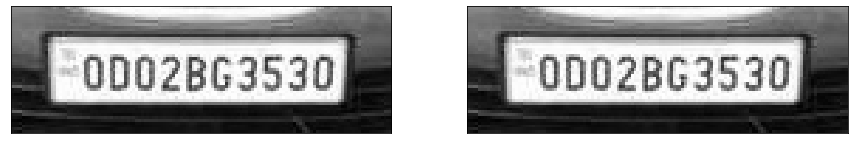

In [312]:
plot_images(image, gray )

In [313]:
#import numpy as np
#import argparse
#import cv2
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,help="numb/number.jpg")
#args = vars(ap.parse_args())
# load the image from disk
#image = cv2.imread(args["image"])

In [314]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

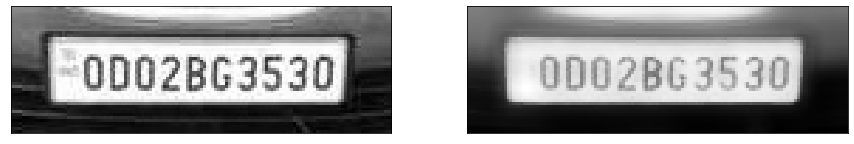

In [315]:
plot_images(gray, blur)

In [316]:
edges = cv2.Canny(blur, 30, 200)


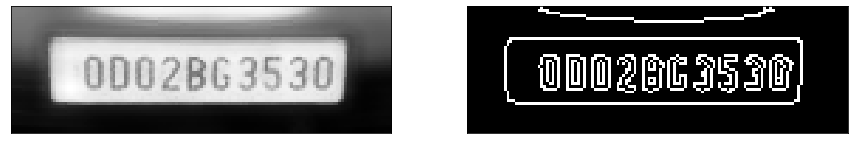

In [317]:
plot_images(blur, edges)

In [318]:
cnts, new = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [319]:
image_copy = image.copy()

In [320]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

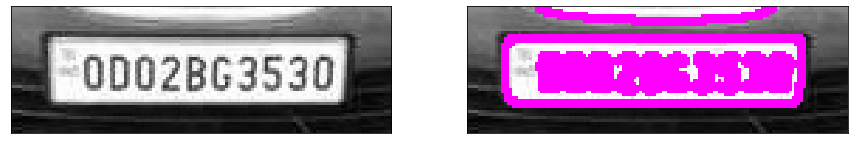

In [321]:
plot_images(image, image_copy)

In [322]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [323]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

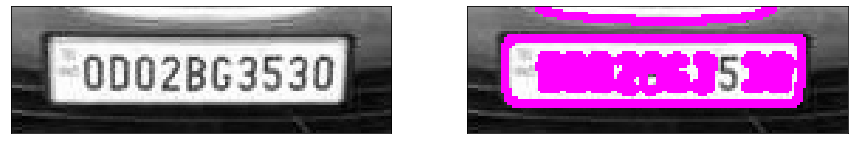

In [324]:
plot_images(image, image_copy)

In [325]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

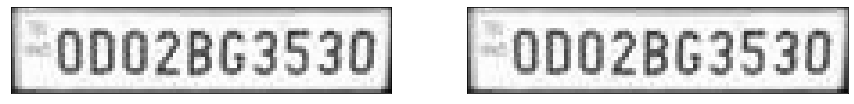

In [326]:
plot_images(plate, plate)

In [327]:
#print(text)

In [328]:
import cv2
import numpy as np
import pandas as pd


def segment_characters(image) :



    # Preprocess cropped license plate image

    img = cv2.resize(image, (333, 75))

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    img_erode = cv2.erode(img_binary, (3,3))

    img_dilate = cv2.dilate(img_erode, (3,3))



    LP_WIDTH = img_dilate.shape[0]

    LP_HEIGHT = img_dilate.shape[1]



    # Make borders white

    img_dilate[0:3,:] = 255

    img_dilate[:,0:3] = 255

    img_dilate[72:75,:] = 255

    img_dilate[:,330:333] = 255



    # Estimations of character contours sizes of cropped license plates

    dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]



    # Get contours within cropped license plate

    char_list = find_contours(dimensions, img_dilate)



    return char_list

import numpy as np

import cv2



# Match contours to license plate or character template

def find_contours(dimensions, img) :



    # Find all contours in the image

    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



    # Retrieve potential dimensions

    lower_width = dimensions[0]

    upper_width = dimensions[1]

    lower_height = dimensions[2]

    upper_height = dimensions[3]

    



    # Check largest 5 or  15 contours for license plate or character respectively

    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]



    x_cntr_list = []

    target_contours = []

    img_res = []

    for cntr in cntrs :

        #detects contour in binary image and returns the coordinates of rectangle enclosing it

        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        

        #checking the dimensions of the contour to filter out the characters by contour's size

        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :

            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours



            char_copy = np.zeros((44,24))

            #extracting each character using the enclosing rectangle's coordinates.

            char = img[intY:intY+intHeight, intX:intX+intWidth]

            char = cv2.resize(char, (20, 40))



            # Make result formatted for classification: invert colors

            char = cv2.subtract(255, char)



            # Resize the image to 24x44 with black border

            char_copy[2:42, 2:22] = char

            char_copy[0:2, :] = 0

            char_copy[:, 0:2] = 0

            char_copy[42:44, :] = 0

            char_copy[:, 22:24] = 0



            img_res.append(char_copy) #List that stores the character's binary image (unsorted)



    #Return characters on ascending order with respect to the x-coordinate (most-left character first)

    

    #arbitrary function that stores sorted list of character indeces

    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])

    img_res_copy = []

    for idx in indices:

        img_res_copy.append(img_res[idx])# stores character images according to their index

    img_res = np.array(img_res_copy)



    return img_res

10


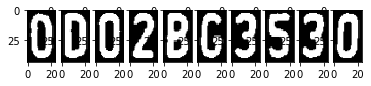

In [329]:
n=len(segment_characters(plate))
print(n)
if n == 10:
    x1,x2,x3,x4,x5,x6,y1,y2,y3,y4 = np.asarray(segment_characters(plate))
    images =[x1,x2,x3,x4,x5,x6,y1,y2,y3,y4]
    images1 =[x1,x2]
    images2 = [x3,x4]
    images3 = [x5,x6]
    images4 = [y1,y2,y3,y4]
    for i in range(10):
    
        plt.subplot(1,10,i+1),plt.imshow(images[i],'gray')
elif n == 9:
    x1,x2,x3,x4,x5,y1,y2,y3,y4 = np.asarray(segment_characters(plate))
    images =[x1,x2,x3,x4,x5,y1,y2,y3,y4]
    images1 =[x1,x2]
    images2 = [x3,x4]
    images3 = [x5]
    images4 = [y1,y2,y3,y4]
    for i in range(9):
    
        plt.subplot(1,9,i+1),plt.imshow(images[i],'gray')
    

In [330]:
from keras.models import load_model
model1 = load_model('model1.h5')
model = load_model('model.h5')

In [331]:
def show_results2(image):
    dic = {}
    characters ='0123456789'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(image): #iterating over the characters
        img = cv2.resize(ch, (28,28))
        #img = fix_dimension(img_)
        img = img.reshape(1,28,28,1) #preparing image for the model
        y_ = model1.predict_classes(img)[0]
        
        #predicting the class
        character = dic[y_] #
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results2(images2))

02


In [332]:
def show_results1(image):
    dic = {}
    characters =' ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(image): #iterating over the characters
        img = cv2.resize(ch, (28,28))
        #img = fix_dimension(img_)
        img = img.reshape(1,28,28,1) #preparing image for the model
        y_ = model.predict_classes(img)[0]
        
        #predicting the class
        character = dic[y_] #
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results1(images1))

OD


In [333]:
APNR_num = show_results1(images1)+show_results2(images2)+show_results1(images3)+show_results2(images4)
print(APNR_num)

OD02BG3530


In [334]:
import openpyxl as xl
import pandas as pd

wb = xl.load_workbook('demo.xlsx')
ws = wb.get_sheet_by_name('Sheet1')
df = pd.read_excel('demo.xlsx')

def replace_first_null(df, col_name, value):
    """
    Replace the first null value in DataFrame df.`col_name`
    with `value`.
    """
    return_df = df.copy()
    idx = list(df.index)
    last_valid = df[col_name].last_valid_index()
    last_valid_row_number = idx.index(last_valid)
    # This next line has mixed number and string indexing
    # but it should be ok, since df is coming from an
    # Excel sheet and should have a consecutive index
    return_df.loc[last_valid_row_number + 1, col_name] = value
    return return_df

def write_df_to_worksheet(ws, df):
    """
    Write the values in df to the worksheet ws in place
    """
    for i, col in enumerate(replaced):
        for j, val in enumerate(replaced[col]):
            if not pd.isnull(val):
                # Python is zero indexed, so add one
                # (plus an extra one to take account
                #  of the header row!)
                ws.cell(row=j+2 , column=i + 1).value = val

# Here's the actual replacing happening
replaced = replace_first_null(df,'VEHICLE NUMBER', APNR_num)
write_df_to_worksheet(ws, df)
wb.save('demo.xlsx')

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """


In [335]:
#x1 = cv2.resize(x1,(28,28))
#print(x1)
#print(x1.reshape(1,784))
#import pandas as pd 
#pd.DataFrame(x1).to_csv("demo.csv")

In [336]:
import openpyxl as xl
import pandas as pd

wb = xl.load_workbook('authorize.xlsx')
ws = wb.get_sheet_by_name('Sheet1')
df = pd.read_excel('authorize.xlsx')



C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """


In [337]:
count = 0
max_row=ws.max_row
# get max column count
max_column=ws.max_column
# iterate over all cells 
# iterate over all rows
for i in range(3,max_row+1):
     
     # iterate over all columns
     for j in range(1,max_column+1):
            cell_obj=ws.cell(row=i,column=j)
            if APNR_num == cell_obj.value :
                print('Authorize number:'+ APNR_num + '/', ws.cell(row=i,column=j+1).value + '/', ws.cell(row=i,column=j+2).value+'\n...... YOU CAN GO NOW!!!!!!' )
                break
            else:
                count = count +1
                break
                        
               
               
Y = max_row-2

if count == Y:
    print('Not a Authorize number \n.........NOT ALLOW!!!!!')
     

    
    
    
       
            
     # print new line
    # print('\n')

Authorize number:OD02BG3530/ IPSIT MISRA/ Lic. NO. 1213141415516516167
...... YOU CAN GO NOW!!!!!!
